In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Sintonia para todas as variáveis
# proc_path = '../dist6_22/proc.csv'
# alm_path = '../dist6_22/alm_seq.csv'
# threshold_path = '../dist6_22/threshold.csv'

# Sintonia Gao
# proc_path = '../dist6_gao/proc.csv'
# alm_path = '../dist6_gao/alm_seq.csv'
# threshold_path = '../dist6_gao/threshold.csv'

# Sintonia variáveis selecionadas
# proc_path = '../dist6_key_var/proc.csv'
# alm_path = '../dist6_key_var/alm_seq.csv'
# threshold_path = '../dist6_key_var/threshold.csv'

# 2/8
# proc_path = '../dist6_data/proc_corr_dist6.csv'
# alm_path = '../dist6_data/alm_seq_corr_dist6.csv'
# threshold_path = '../dist6_data/corr_threshold_MultiLoop_mode1_73_dist6.csv'

# .5 / 2.5
##proc_path = '../dist6_3horas_sig/proc.csv'
proc_path = '../proc_i3e.csv'
alm_path = '../dist6_3horas_sig/alm_seq.csv'
threshold_path = '../dist6_3horas_sig/threshold.csv'

In [59]:
proc_df = pd.read_csv(proc_path, index_col='TOUT', usecols=['TOUT']+["XMEAS%02d" % x for x in  [1,2,3,6,7,8,9,21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

,XMEAS01,XMEAS02,XMEAS03,XMEAS06,XMEAS07,XMEAS08,XMEAS09,XMEAS21
TOUT,,,,,,,,
2019-12-10 16:54:17.616330147,0.271033,3649.739415,4451.320791,47.559754,2798.975799,64.995825,122.898796,102.480028
2019-12-10 16:54:53.616330147,0.270093,3663.351750,4428.605105,47.917222,2799.059838,65.254940,122.883398,102.484819
2019-12-10 16:55:29.616330147,0.271255,3656.090868,4429.093949,47.750928,2799.345791,64.930642,122.909663,102.499473
2019-12-10 16:56:05.616330147,0.269950,3664.897833,4439.129238,47.305023,2799.251300,65.188788,122.909316,102.465085
2019-12-10 16:56:41.616330147,0.270947,3616.540495,4446.078748,47.813862,2798.967112,65.686033,122.887484,102.463271


In [62]:
threshold_df = pd.read_csv(threshold_path, index_col='proc_var')
threshold_df = threshold_df.loc[[1,2,3,6,7,8,9,21]]
threshold_df


,limit,type,dead_band,delay_time
proc_var,,,,
1,0.249111,LOW,NaN,NaN
1,0.284437,HIGH,NaN,NaN
2,3597.394823,LOW,NaN,NaN
2,3711.109968,HIGH,NaN,NaN
3,4371.271459,LOW,NaN,NaN
3,4514.069121,HIGH,NaN,NaN
6,46.954535,LOW,NaN,NaN
6,48.235269,HIGH,NaN,NaN
7,2796.971605,LOW,NaN,NaN


In [14]:
#Analysis for 3sigma method
# threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
# threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,6,8,9,21]]

In [15]:
threshold_sigma_df

,limit,type,dead_band,delay_time
proc_var,,,,
1,0.249111,LOW,NaN,NaN
1,0.284437,HIGH,NaN,NaN
2,3597.394823,LOW,NaN,NaN
2,3711.109968,HIGH,NaN,NaN
3,4371.271459,LOW,NaN,NaN
3,4514.069121,HIGH,NaN,NaN
8,63.494953,LOW,NaN,NaN
8,66.505576,HIGH,NaN,NaN
9,122.867269,LOW,NaN,NaN


In [7]:
alm_df = pd.read_csv(alm_path, index_col='tout', usecols=['tout']+["xmeas%02d_low" % x for x in  [1, 2, 3, 8, 9, 21]]+["xmeas%02d_high" % x for x in  [1, 2, 3, 8, 9, 21]])
alm_df.index = proc_df.index
alm_df.head()

,xmeas01_low,xmeas02_low,xmeas03_low,xmeas08_low,xmeas09_low,xmeas21_low,xmeas01_high,xmeas02_high,xmeas03_high,xmeas08_high,xmeas09_high,xmeas21_high
tout,,,,,,,,,,,,
2018-03-14 16:14:42.157200098,0,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:15:18.157200098,1,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:15:54.157200098,1,0,0,0,0,0,0,0,0,0,0,0
2018-03-14 16:16:30.157200098,1,0,0,0,0,0,0,0,0,0,0,1
2018-03-14 16:17:06.157200098,1,0,0,0,1,0,0,0,0,0,0,1


0.249111322201095
0.284437306241865
3597.39482330584
3711.1099682950103
4371.2714589391
4514.06912137061
46.954535473038995
48.235268556415605


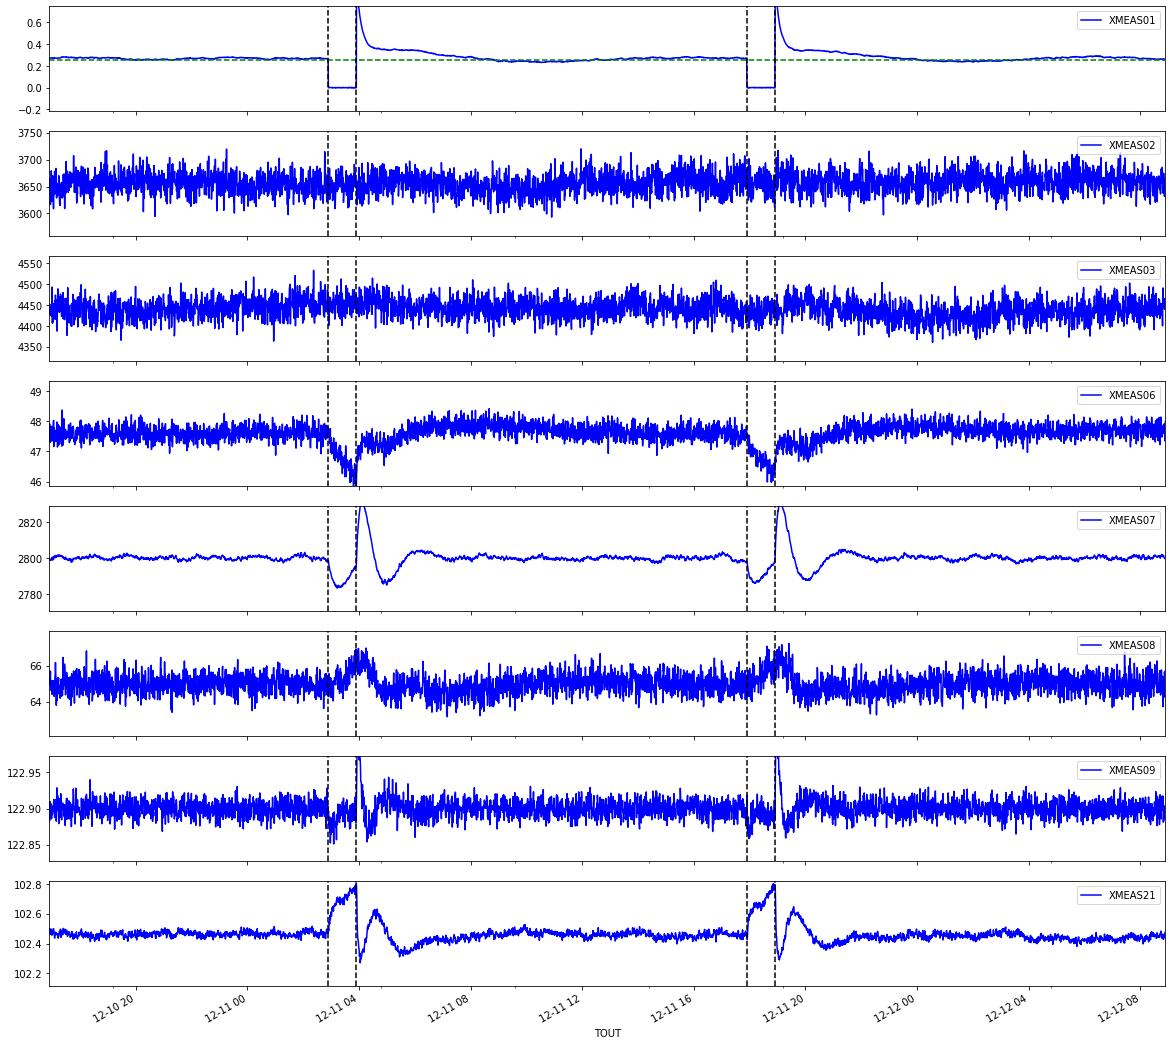

In [72]:
var_names = ['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]]
axes = proc_df[var_names].iloc[0:4000].plot(subplots=True, figsize=(20, 20), color='blue', scaley='linear')

# alm_diff_df = alm_df.iloc[300:400].diff()
for i, ax in enumerate(axes):
    mean = np.mean(proc_df[proc_df.columns[i]])
    sig = np.std(proc_df[proc_df.columns[i]])
    ax.set_ylim(mean - 5*sig , mean+ 5*sig)

    print(threshold_df.iloc[i].limit)
    ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
#     ax.axhline(y=threshold_df.iloc[i*(2)].limit, color="gray", ls='--')
#     ax.axhline(y=threshold_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
#     diff_high = alm_diff_df[var_names[i]+'_high']
#     begin_high = alm_diff_df[diff_high > 0].index
#     end_high = alm_diff_df[diff_high < 0].index
    
#     if begin_high.size > end_high.size:
#         end_high = np.append(end_high, a.size)
#     elif begin_high.size < end_high.size:
#         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name) 
#     elif begin_high.size == 0 and end_high.size == 0:
#         begin_high = []
#         end_high = []
#     elif np.all(begin_high > end_high):
#         begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].name)
#         end_high = np.append(end_high, a.size)
    
#     for b, e in zip(begin_high, end_high):
#         ax.axvspan(b, e, color="red")
        
        
#     diff_low = alm_diff_df[var_names[i]+'_low']
#     begin_low = alm_diff_df[diff_low > 0].index
#     end_low = alm_diff_df[diff_low < 0].index
    
#     if begin_low.size > end_low.size:
#         end_low = np.append(end_low, a.size)
#     elif begin_low.size < end_low.size:
#         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name) 
#     elif begin_low.size == 0 and end_low.size == 0:
#         begin_low = []
#         end_low = []
#     elif np.all(begin_low > end_low):
#         print(begin_low)
#         begin_low = np.insert(begin_low, 0, alm_diff_df.iloc[0].name)
#         end_low = np.append(end_low, a.size)
    
#     for b, e in zip(begin_low, end_low):
#         ax.axvspan(b, e, color="yellow")
#     ax.axvline(x=proc_df.index[200], color="black", ls='--')
    

#     ax.axvspan(proc_df.index[300], proc_df.index[350], color="pink", ls='--')
    ax.axvline(x=proc_df.index[1000], color="black", ls='--')
    ax.axvline(x=proc_df.index[1100], color="black", ls='--')
    
    ax.axvline(x=proc_df.index[2500], color="black", ls='--')
    ax.axvline(x=proc_df.index[2600], color="black", ls='--')
    ax.legend(loc='upper right')
plt.show()

0.249111322201095
0.284437306241865
3597.39482330584
3711.1099682950103
4371.2714589391
4514.06912137061
46.954535473038995
48.235268556415605


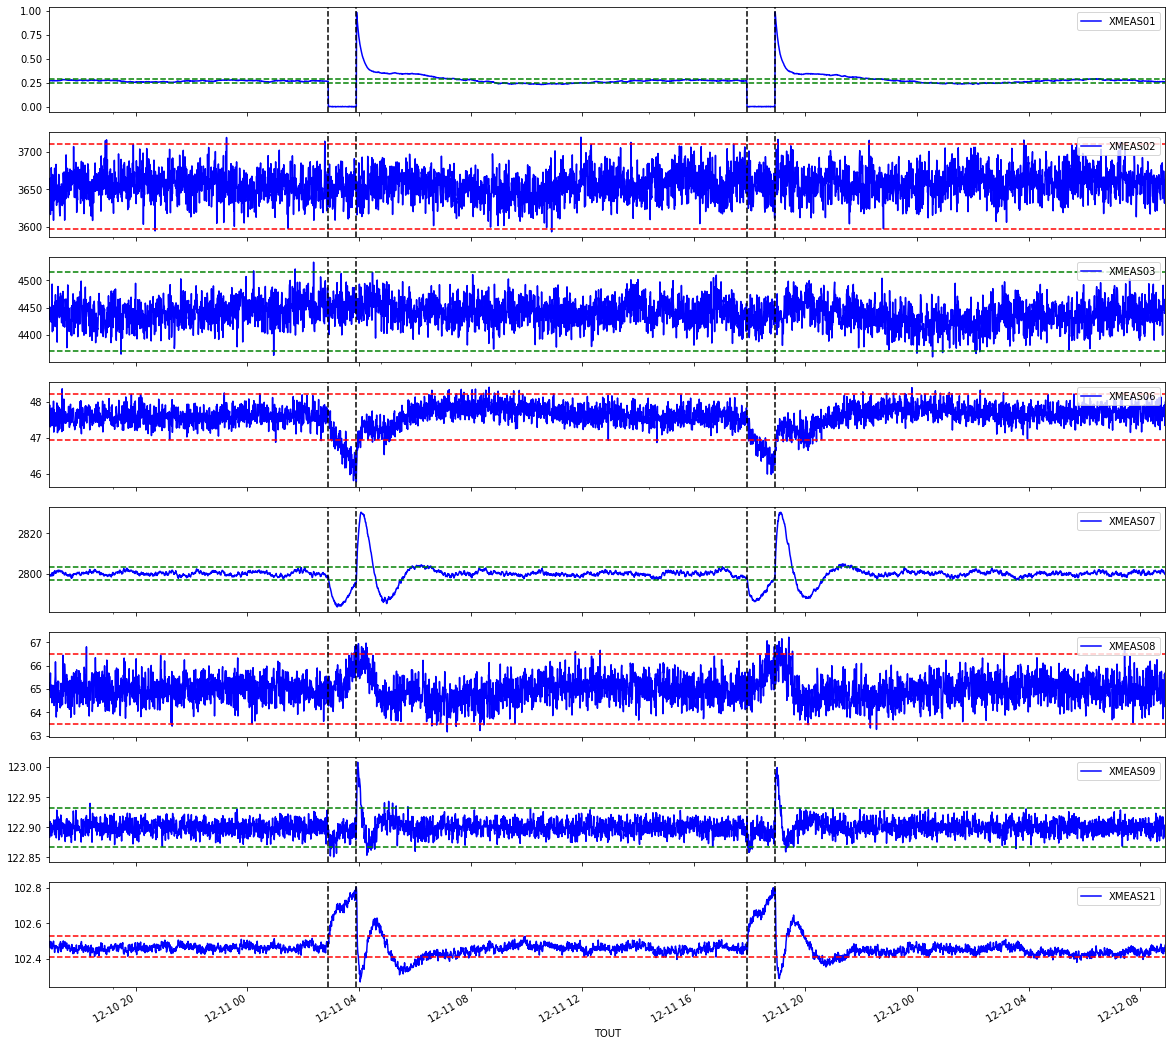

In [91]:
var_names = ['XMEAS%02d' % x for x in [1,2,3,6,7,8,9,21]]
axes = proc_df[var_names].iloc[0:4000].plot(subplots=True, figsize=(20, 20), color='blue',)

# alm_diff_df = alm_df.iloc[300:400].diff()
for i, ax in enumerate(axes):
    mean = np.mean(proc_df[proc_df.columns[i]])
    sig = np.std(proc_df[proc_df.columns[i]])
    
#     ax.axhline(y=threshold_df.iloc[i].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    ax.axhline(y=threshold_df.iloc[i*(2)].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    ax.axhline(y=threshold_df.iloc[i*(2) + 1].limit, color="red" if threshold_df.iloc[i].type == "HIGH" else "green", ls='--')
    
    
    print(threshold_df.iloc[i].limit)
    ax.axvline(x=proc_df.index[1000], color="black", ls='--')
    ax.axvline(x=proc_df.index[1100], color="black", ls='--')
    
    ax.axvline(x=proc_df.index[2500], color="black", ls='--')
    ax.axvline(x=proc_df.index[2600], color="black", ls='--')
    ax.legend(loc='upper right')
plt.show()

In [9]:
# begin_high = np.insert(begin_high, 0, alm_diff_df.iloc[0].index)
alm_diff_df.iloc[0].name

Timestamp('2018-03-14 19:14:42.157200098')

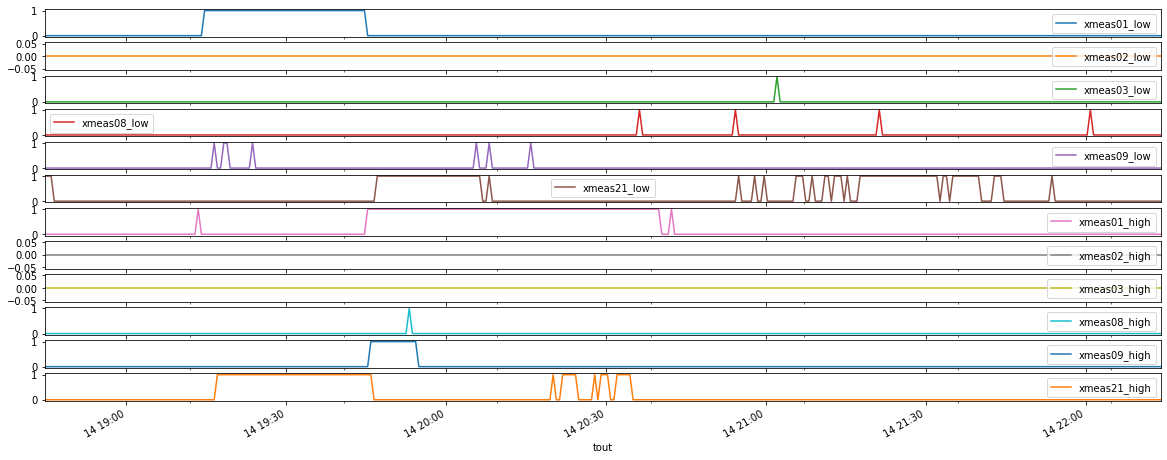

In [9]:
# alm_df.rolling(10).mean().round().iloc[0:2600].plot(subplots=True, figsize=(20, 8))
alm_df.iloc[250:600].plot(subplots=True, figsize=(20, 8))
plt.show()

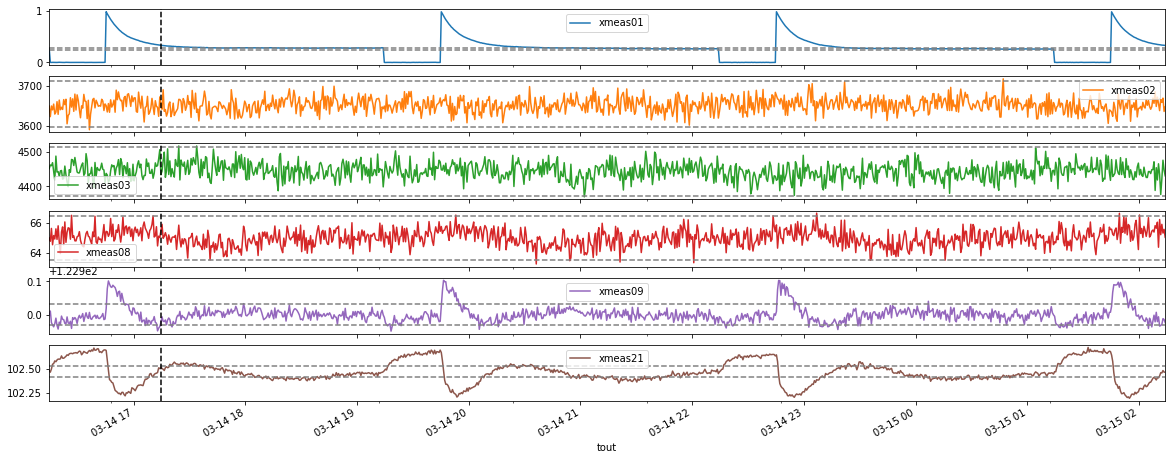

In [12]:
#Plot vars 3sigma method
proc_df = pd.read_csv(proc_path, index_col='tout', usecols=['tout']+["xmeas%02d" % x for x in  [1,2,3,8,9,21]])
proc_df.index = pd.to_datetime(proc_df.index, unit='s')
proc_df.head()

threshold_sigma_df = pd.read_csv('../sigma_threshold_MultiLoop_mode1_73.csv', index_col='proc_var')
threshold_sigma_df = threshold_sigma_df.loc[[1,2,3,8,9,21]]

axes = proc_df.iloc[0:1000].plot(subplots=True, figsize=(20, 8))
for i, ax in enumerate(axes):
    ax.axhline(y=threshold_sigma_df.iloc[i*(2)].limit, color="gray", ls='--')
    ax.axhline(y=threshold_sigma_df.iloc[i*(2) + 1].limit, color="gray", ls='--')
    
    ax.axvline(x=proc_df.index[100], color="black", ls='--')
    ax.axvline(x=proc_df.index[1300], color="black", ls='--')
    ax.axvline(x=proc_df.index[1400], color="black", ls='--')
plt.show()

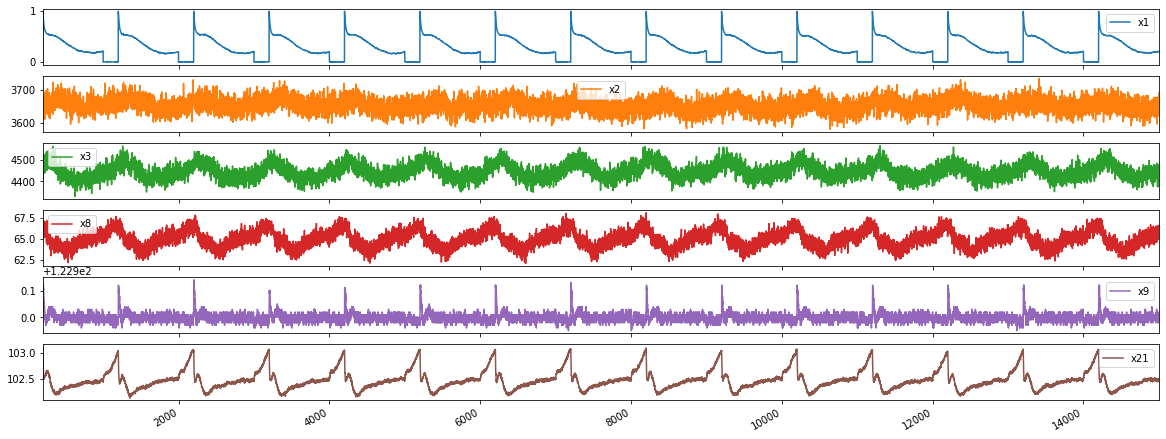

In [48]:
p = pd.read_csv("../dist6_process.csv", names=["x%1d" % x for x in  range(1,74)])
p = p[["x%1d" % x for x in  [1,2,3,8,9,21]]]
p.iloc[200:15000].plot(subplots=True, figsize=(20, 8))
plt.show()

In [43]:
p.head(160000)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73
0,0.271030,3649.7,4451.3,9.2231,32.393,47.560,2799.0,64.996,122.90,0.19783,...,0.00000,0.000000,99.990,0.010000,48.500,0.50000,51.000,0.000000,0.0000,0.000000
1,0.000965,3623.4,4462.4,9.2609,32.427,47.450,2797.8,64.782,122.91,0.19700,...,0.00000,0.000000,99.990,0.010000,48.500,0.50000,51.000,0.000000,0.0000,0.000000
2,-0.000553,3649.9,4460.0,9.2462,32.702,47.542,2796.4,65.641,122.88,0.19782,...,0.00000,0.000000,99.990,0.010000,48.500,0.50000,51.000,0.000000,0.0000,0.000000
3,0.001179,3640.3,4468.9,9.1018,32.414,47.449,2795.3,64.547,122.87,0.19982,...,0.00000,0.000000,99.990,0.010000,48.500,0.50000,51.000,0.000000,0.0000,0.000000
4,-0.000089,3654.6,4444.1,9.0979,32.263,47.324,2794.4,65.163,122.86,0.19194,...,0.00000,0.000000,99.990,0.010000,48.500,0.50000,51.000,0.000000,0.0000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51196,0.272320,3689.7,4454.1,9.1773,32.484,47.442,2799.0,65.245,122.90,0.18021,...,-0.13189,0.015615,99.876,0.049391,48.868,0.35766,51.208,-0.023732,-0.1114,0.053782
51197,0.273110,3665.8,4450.4,9.2675,32.711,47.531,2798.3,65.676,122.88,0.18051,...,-0.13189,0.015615,99.876,0.049391,48.868,0.35766,51.208,-0.023732,-0.1114,0.053782
51198,0.271440,3681.2,4384.6,9.1943,32.234,47.357,2798.9,65.065,122.91,0.17903,...,-0.13189,0.015615,99.876,0.049391,48.868,0.35766,51.208,-0.023732,-0.1114,0.053782
51199,0.271280,3689.1,4430.2,9.2549,32.620,47.140,2800.0,65.567,122.90,0.18041,...,-0.13189,0.015615,99.876,0.049391,48.868,0.35766,51.208,-0.023732,-0.1114,0.053782
